In [21]:
import pandas as pd
#create DataFrame
df = pd.DataFrame({'points': [4, 4, 7, 8, 12, 13, 15, 18, 22, 23, 23, 25],
                   'assists': [2, 5, 4, 7, 7, 8, 5, 4, 5, 11, 13, 8],
                   'rebounds': [7, 7, 4, 6, 3, 8, 9, 9, 12, 11, 8, 9]})
df.head(10)

,points,assists,rebounds
0,4,2,7
1,4,5,7
2,7,4,4
3,8,7,6
4,12,7,3
5,13,8,8
6,15,5,9
7,18,4,9
8,22,5,12
9,23,11,11


In [22]:
#Kiểm tra data frame
df.shape

(12, 3)

In [23]:
#perform data binning on points variable
df['points_bin'] = pd.qcut(df['points'], q=3)
#q là số khoảng bạn muốn chia
#view updated DataFrame
print(df)

    points  assists  rebounds        points_bin
0        4        2         7   (3.999, 10.667]
1        4        5         7   (3.999, 10.667]
2        7        4         4   (3.999, 10.667]
3        8        7         6   (3.999, 10.667]
4       12        7         3  (10.667, 19.333]
5       13        8         8  (10.667, 19.333]
6       15        5         9  (10.667, 19.333]
7       18        4         9  (10.667, 19.333]
8       22        5        12    (19.333, 25.0]
9       23       11        11    (19.333, 25.0]
10      23       13         8    (19.333, 25.0]
11      25        8         9    (19.333, 25.0]


In [24]:
#count frequency of each bin
#có bao nhiêu point trong khoảng points_bin
df['points_bin'].value_counts()

points_bin
(3.999, 10.667]     4
(10.667, 19.333]    4
(19.333, 25.0]      4
Name: count, dtype: int64

In [25]:
#tạo phân vị từ 0.0 -> 1.0
df['points_bin'] = pd.qcut(df['points'], q=[0, .2, .4, .6, .8, 1])
print(df)

    points  assists  rebounds    points_bin
0        4        2         7  (3.999, 7.2]
1        4        5         7  (3.999, 7.2]
2        7        4         4  (3.999, 7.2]
3        8        7         6   (7.2, 12.4]
4       12        7         3   (7.2, 12.4]
5       13        8         8  (12.4, 16.8]
6       15        5         9  (12.4, 16.8]
7       18        4         9  (16.8, 22.8]
8       22        5        12  (16.8, 22.8]
9       23       11        11  (22.8, 25.0]
10      23       13         8  (22.8, 25.0]
11      25        8         9  (22.8, 25.0]


In [26]:
#count frequency of each bin
#có bao nhiêu point trong khoảng points_bin
df['points_bin'].value_counts()

points_bin
(3.999, 7.2]    3
(22.8, 25.0]    3
(7.2, 12.4]     2
(12.4, 16.8]    2
(16.8, 22.8]    2
Name: count, dtype: int64

In [27]:
#Cắt cột theo phân vị sau đó gán thêm A B C D E
#perform data binning on points variable with specific quantiles and labels
df['points_bin'] = pd.qcut(df['points'],
                           q=[0, .2, .4, .6, .8, 1],
                           labels=['A', 'B', 'C', 'D', 'E'])

#view updated DataFrame
print(df)

    points  assists  rebounds points_bin
0        4        2         7          A
1        4        5         7          A
2        7        4         4          A
3        8        7         6          B
4       12        7         3          B
5       13        8         8          C
6       15        5         9          C
7       18        4         9          D
8       22        5        12          D
9       23       11        11          E
10      23       13         8          E
11      25        8         9          E


In [28]:
#create DataFrame with one categorical variable and one numeric variable
df = pd.DataFrame({'team': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
                   'points': [12, 15, 19, 22, 24, 25, 26, 30]})

#view DataFrame
df.head(10)

,team,points
0,A,12
1,B,15
2,C,19
3,D,22
4,E,24
5,F,25
6,G,26
7,H,30


In [29]:
#create categorical variable 'status' based on existing numerical 'points' variable
#tạo cột status 
df['status'] = pd.cut(df['points'],
                      bins=[0, 15, 25, float('Inf')],
                      labels=['Bad', 'OK', 'Good'])
#bins=[0, 15, 25, float('Inf')] float('Inf') là vô cực
#view updated DataFrame
print(df)

  team  points status
0    A      12    Bad
1    B      15    Bad
2    C      19     OK
3    D      22     OK
4    E      24     OK
5    F      25     OK
6    G      26   Good
7    H      30   Good


In [30]:
#kĩ thuật số hoá 
ids = [11, 22, 33, 44, 55, 66, 77]
countries = ['Spain', 'France', 'Spain', 'Germany', 'France']
df = pd.DataFrame(list(zip(ids, countries)),
                  columns=['Ids', 'Countries'])
df.head(10)

,Ids,Countries
0,11,Spain
1,22,France
2,33,Spain
3,44,Germany
4,55,France


In [31]:
#dựa tên Country 
#số hoá thành 1-0
y = pd.get_dummies(df.Countries, prefix='Country')
y.head()

,Country_France,Country_Germany,Country_Spain
0,False,False,True
1,True,False,False
2,False,False,True
3,False,True,False
4,True,False,False


In [32]:
#ghép 3 cột mới vào data frame
dfOneHotEncoding = pd.get_dummies(df.Countries, prefix='Country')
print(dfOneHotEncoding.head())
df=pd.concat([df,dfOneHotEncoding],axis=1)
df

   Country_France  Country_Germany  Country_Spain
0           False            False           True
1            True            False          False
2           False            False           True
3           False             True          False
4            True            False          False


,Ids,Countries,Country_France,Country_Germany,Country_Spain
0,11,Spain,False,False,True
1,22,France,True,False,False
2,33,Spain,False,False,True
3,44,Germany,False,True,False
4,55,France,True,False,False


In [33]:
#tạo ma trận từ 3 cột Country_France  Country_Germany  Country_Spain
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(df.Countries)
y

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [34]:
#vẽ ma trận số thực 
from sklearn.preprocessing import OneHotEncoder
y = OneHotEncoder().fit_transform(df[['Countries']]).toarray()
print(y)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [35]:
#Chuẩn hoá dữ liệu
#Machine Learning
#kĩ thuật standardization
#x (scale)=x/max(|x|)
#x (scale)=(x-x (min))/x (max)-x(min), phương pháp min max scale
#z(core) =(x-mean)/std
import numpy as np
year=[2010,2011,2012,2013,2014,2015]
salaryHCM=[8.5,9.0,9.5,9.0,10.0,10.0]
salaryLA=[5.5,6.0,6.0,5.5,6.0,5.0]
print('Trung Bình')
print("Salary HCM: ",np.mean(salaryHCM))
print("Salary LA: ",np.mean(salaryLA))
print('Độ lệch chuẩn')
print("Salary HCM: ",np.std(salaryHCM))
print("Salary LA: ",np.std(salaryLA))

Trung Bình
Salary HCM:  9.333333333333334
Salary LA:  5.666666666666667
Độ lệch chuẩn
Salary HCM:  0.5527707983925667
Salary LA:  0.37267799624996495


In [36]:
#giảm thiểu tính toán số lớn
import pandas as pd

df = pd.DataFrame.from_dict({
    'Age': [10, 35, 34, 23, 70, 55, 89],
    'Height': [130, 178, 155, 133, 195, 150, 205],
    'Weight': [80, 200, 220, 150, 140, 95, 180]
})
df

,Age,Height,Weight
0,10,130,80
1,35,178,200
2,34,155,220
3,23,133,150
4,70,195,140
5,55,150,95
6,89,205,180


In [37]:
#maximun scale 
#sklearn (cuối kì)
# Use Scikit-learn to transform with maximum absolute scaling
def absolute_maximum_scale(series):
    return series / series.abs().max()
for col in df.columns:
    df[col] = absolute_maximum_scale(df[col])
print(df)

        Age    Height    Weight
0  0.112360  0.634146  0.363636
1  0.393258  0.868293  0.909091
2  0.382022  0.756098  1.000000
3  0.258427  0.648780  0.681818
4  0.786517  0.951220  0.636364
5  0.617978  0.731707  0.431818
6  1.000000  1.000000  0.818182


In [38]:
#tính z-score
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

for col in df.columns:
    df[col] = min_max_scaling(df[col])

print(df.head())

        Age    Height    Weight
0  0.000000  0.000000  0.000000
1  0.316456  0.640000  0.857143
2  0.303797  0.333333  1.000000
3  0.164557  0.040000  0.500000
4  0.759494  0.866667  0.428571


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

print(scaled_df)

        Age    Height    Weight
0  0.000000  0.000000  0.000000
1  0.316456  0.640000  0.857143
2  0.303797  0.333333  1.000000
3  0.164557  0.040000  0.500000
4  0.759494  0.866667  0.428571
5  0.569620  0.266667  0.107143
6  1.000000  1.000000  0.714286


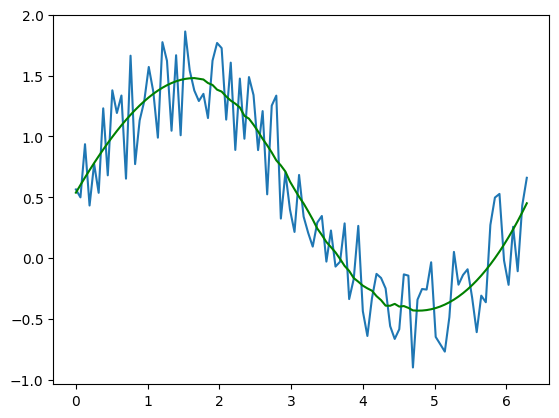

In [40]:
#ajust Data: điều chỉnh dữ liệu
#smoothing Data: làm mịn dữ liệu
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

x=np.linspace(0,2*np.pi,100)
y=np.sin(x)+np.random.random(100)
yhat=savgol_filter(y,51,3)

plt.plot(x,y)
plt.plot(x,yhat,color='green')
plt.show()